In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats  # 과학용 계산 라이브러리
from sklearn.datasets import load_boston  # 사이킷런 데이타셋

In [2]:
from sklearn.datasets import load_linnerud

linnerud = load_linnerud()
print(linnerud.DESCR)


.. _linnerrud_dataset:

Linnerrud dataset
-----------------

**Data Set Characteristics:**

    :Number of Instances: 20
    :Number of Attributes: 3
    :Missing Attribute Values: None

The Linnerud dataset is a multi-output regression dataset. It consists of three
exercise (data) and three physiological (target) variables collected from
twenty middle-aged men in a fitness club:

- *physiological* - CSV containing 20 observations on 3 physiological variables:
   Weight, Waist and Pulse.
- *exercise* - CSV containing 20 observations on 3 exercise variables:
   Chins, Situps and Jumps.

.. topic:: References

  * Tenenhaus, M. (1998). La regression PLS: theorie et pratique. Paris:
    Editions Technic.



In [3]:
linnerud

{'data': array([[  5., 162.,  60.],
        [  2., 110.,  60.],
        [ 12., 101., 101.],
        [ 12., 105.,  37.],
        [ 13., 155.,  58.],
        [  4., 101.,  42.],
        [  8., 101.,  38.],
        [  6., 125.,  40.],
        [ 15., 200.,  40.],
        [ 17., 251., 250.],
        [ 17., 120.,  38.],
        [ 13., 210., 115.],
        [ 14., 215., 105.],
        [  1.,  50.,  50.],
        [  6.,  70.,  31.],
        [ 12., 210., 120.],
        [  4.,  60.,  25.],
        [ 11., 230.,  80.],
        [ 15., 225.,  73.],
        [  2., 110.,  43.]]),
 'feature_names': ['Chins', 'Situps', 'Jumps'],
 'target': array([[191.,  36.,  50.],
        [189.,  37.,  52.],
        [193.,  38.,  58.],
        [162.,  35.,  62.],
        [189.,  35.,  46.],
        [182.,  36.,  56.],
        [211.,  38.,  56.],
        [167.,  34.,  60.],
        [176.,  31.,  74.],
        [154.,  33.,  56.],
        [169.,  34.,  50.],
        [166.,  33.,  52.],
        [154.,  34.,  64.],
        

In [34]:
df = pd.concat([pd.DataFrame(linnerud.data, columns=linnerud.feature_names),
                pd.DataFrame(linnerud.target, columns=linnerud.target_names)],
               axis=1)
df

,Chins,Situps,Jumps,Weight,Waist,Pulse
0,5.0,162.0,60.0,191.0,36.0,50.0
1,2.0,110.0,60.0,189.0,37.0,52.0
2,12.0,101.0,101.0,193.0,38.0,58.0
3,12.0,105.0,37.0,162.0,35.0,62.0
4,13.0,155.0,58.0,189.0,35.0,46.0
5,4.0,101.0,42.0,182.0,36.0,56.0
6,8.0,101.0,38.0,211.0,38.0,56.0
7,6.0,125.0,40.0,167.0,34.0,60.0
8,15.0,200.0,40.0,176.0,31.0,74.0
9,17.0,251.0,250.0,154.0,33.0,56.0


In [35]:
Y = df['Pulse']
Y

0     50.0
1     52.0
2     58.0
3     62.0
4     46.0
5     56.0
6     56.0
7     60.0
8     74.0
9     56.0
10    50.0
11    52.0
12    64.0
13    50.0
14    46.0
15    62.0
16    54.0
17    52.0
18    54.0
19    68.0
Name: Pulse, dtype: float64

In [36]:
X = df.drop(['Pulse'], axis = 1)
X

,Chins,Situps,Jumps,Weight,Waist
0,5.0,162.0,60.0,191.0,36.0
1,2.0,110.0,60.0,189.0,37.0
2,12.0,101.0,101.0,193.0,38.0
3,12.0,105.0,37.0,162.0,35.0
4,13.0,155.0,58.0,189.0,35.0
5,4.0,101.0,42.0,182.0,36.0
6,8.0,101.0,38.0,211.0,38.0
7,6.0,125.0,40.0,167.0,34.0
8,15.0,200.0,40.0,176.0,31.0
9,17.0,251.0,250.0,154.0,33.0


In [37]:
from sklearn.model_selection import train_test_split
X = X.iloc[:,0:5].values

In [38]:
X

array([[  5., 162.,  60., 191.,  36.],
       [  2., 110.,  60., 189.,  37.],
       [ 12., 101., 101., 193.,  38.],
       [ 12., 105.,  37., 162.,  35.],
       [ 13., 155.,  58., 189.,  35.],
       [  4., 101.,  42., 182.,  36.],
       [  8., 101.,  38., 211.,  38.],
       [  6., 125.,  40., 167.,  34.],
       [ 15., 200.,  40., 176.,  31.],
       [ 17., 251., 250., 154.,  33.],
       [ 17., 120.,  38., 169.,  34.],
       [ 13., 210., 115., 166.,  33.],
       [ 14., 215., 105., 154.,  34.],
       [  1.,  50.,  50., 247.,  46.],
       [  6.,  70.,  31., 193.,  36.],
       [ 12., 210., 120., 202.,  37.],
       [  4.,  60.,  25., 176.,  37.],
       [ 11., 230.,  80., 157.,  32.],
       [ 15., 225.,  73., 156.,  33.],
       [  2., 110.,  43., 138.,  33.]])

In [39]:
X.shape

(20, 5)

In [40]:
Y.shape

(20,)

In [41]:
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [42]:
import numpy as np
# 평균

mean = np.mean(X_train, axis = 0)

# 표준편차
std = np.std(X_train, axis = 0) # 표준편차값

# 표준화값
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(8, activation = 'relu', input_shape = (5,)))
model.add(Dense(4, activation = 'relu'))
model.add(Dense(1)) 
model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 8)                 48        
                                                                 
 dense_13 (Dense)            (None, 4)                 36        
                                                                 
 dense_14 (Dense)            (None, 1)                 5         
                                                                 
Total params: 89 (356.00 Byte)
Trainable params: 89 (356.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [45]:
N_EPOCHS = 10
history = model.fit(X_train, y_train, epochs = N_EPOCHS, validation_data=(X_test, y_test))

Epoch 1/10
1/1 [==============================] - 0s 36ms/step - loss: 3011.0884 - mse: 3011.0884 - val_loss: 3940.7854 - val_mse: 3940.7854
Epoch 2/10
1/1 [==============================] - 0s 16ms/step - loss: 3010.2896 - mse: 3010.2896 - val_loss: 3939.7156 - val_mse: 3939.7156
Epoch 3/10
1/1 [==============================] - 0s 16ms/step - loss: 3009.5334 - mse: 3009.5334 - val_loss: 3938.6941 - val_mse: 3938.6941
Epoch 4/10
1/1 [==============================] - 0s 16ms/step - loss: 3008.8101 - mse: 3008.8101 - val_loss: 3937.7102 - val_mse: 3937.7102
Epoch 5/10
1/1 [==============================] - 0s 16ms/step - loss: 3008.1128 - mse: 3008.1128 - val_loss: 3936.7578 - val_mse: 3936.7578
Epoch 6/10
1/1 [==============================] - 0s 16ms/step - loss: 3007.4365 - mse: 3007.4365 - val_loss: 3935.8303 - val_mse: 3935.8303
Epoch 7/10
1/1 [==============================] - 0s 16ms/step - loss: 3006.7773 - mse: 3006.7773 - val_loss: 3934.9236 - val_mse: 3934.9236
Epoch 8/10
1/

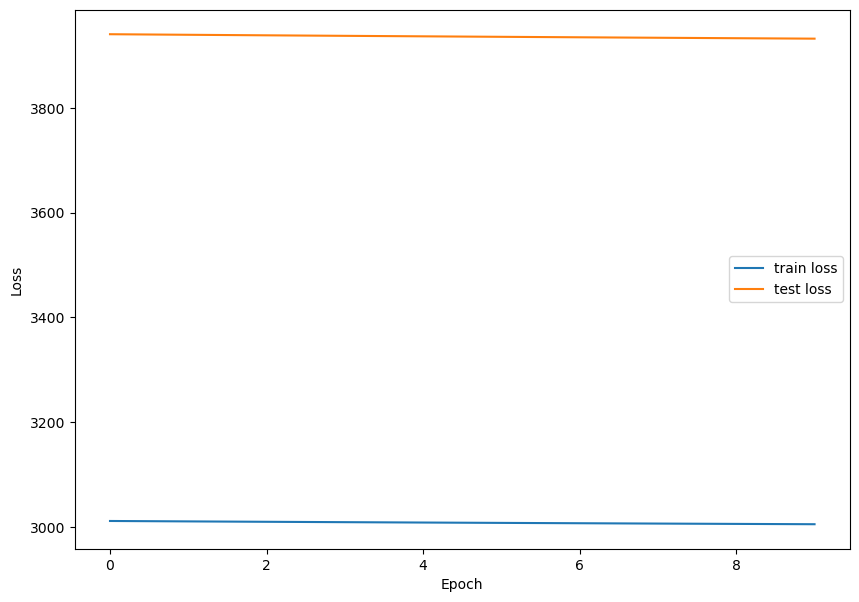

In [46]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()